In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from datetime import datetime

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from dask.diagnostics import ProgressBar
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, f1_score, roc_curve, auc, precision_score,recall_score

In [2]:
plt.style.use(['fivethirtyeight'])

In [3]:
matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)

In [4]:
df_ox = pd.read_csv('/home/piai/바탕화면/빅데이터프로젝트/Oxidation.csv').iloc[:,1:]
df_ox

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2021
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2021
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2021
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2021
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2021
1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2021
1701,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,32,13,28-02-2021
1702,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,32,14,28-02-2021


# 결측치확인

In [5]:
df_ox.isnull().sum()

No_Die        0
Ox_Chamber    0
process       0
type          0
Temp_OXid     0
Vapor         0
ppm           0
Pressure      0
Oxid_time     0
thickness     0
Lot_Num       0
Wafer_Num     0
Datetime      0
dtype: int64

# 범주 확인

In [6]:
df_ox["Ox_Chamber"].unique()

array([2, 3, 1])

In [7]:
df_ox["Vapor"].unique()

array(['O2', 'H2O'], dtype=object)

In [8]:
df_ox["Lot_Num"].unique()

array([13, 14, 15, 16, 17, 18, 19, 20,  1, 21,  2, 22,  3, 23,  4, 24,  5,
       25,  6, 26,  7, 27,  8, 28,  9, 29, 10, 30, 11, 31, 12, 32])

In [9]:
df_ox["Wafer_Num"].unique()

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27])

# 데이터 파악

In [10]:
df_ox.describe()

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,1.952465,1069.505134,33.434173,0.210747,98.392019,711.019512,16.281690,27.394366
std,0.812826,149.790056,8.078535,0.009245,72.350780,7.993529,9.114164,15.586611
min,1.000000,862.011276,21.070000,0.180000,-6.000000,681.435000,1.000000,1.000000
25%,1.000000,889.549749,26.110000,0.204000,31.000000,706.930000,8.000000,14.000000
50%,2.000000,1075.160409,33.675000,0.212000,85.000000,711.690500,16.000000,27.500000
75%,3.000000,1192.077105,39.510000,0.217000,147.000000,715.478000,24.000000,41.000000
max,3.000000,1348.471208,49.910000,0.229000,291.000000,737.402000,32.000000,54.000000


In [11]:
df_ox.dtypes

No_Die         object
Ox_Chamber      int64
process        object
type           object
Temp_OXid     float64
Vapor          object
ppm           float64
Pressure      float64
Oxid_time       int64
thickness     float64
Lot_Num         int64
Wafer_Num       int64
Datetime       object
dtype: object

범주형 : No_Die, Process(=oxidation), type(dry/wet), Vapor(H2O, O2), Datetime, Ox_Chamber(int로 되어있는데 1,2,3만 있음)  
연속형 : Temp_Oxid, ppm, Pressure, Oxid_time, thickness, Lot_Num, Wafer_Num

# 연속형 이상치학인_BoxPlot

<AxesSubplot:>

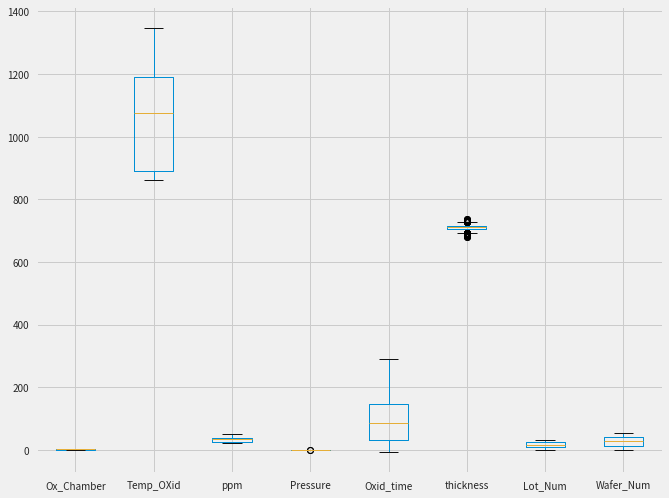

In [12]:
df_ox.boxplot(figsize=(10,8))

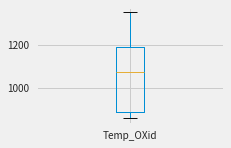

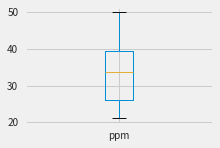

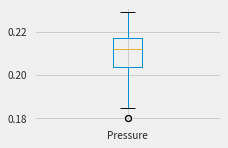

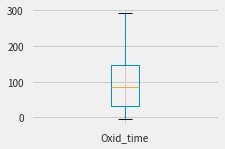

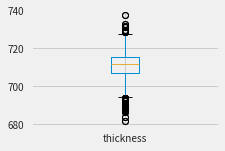

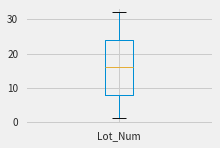

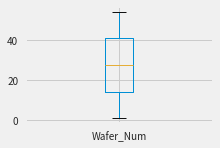

In [13]:
for i in ["Temp_OXid", "ppm", "Pressure", "Oxid_time", "thickness", "Lot_Num", "Wafer_Num"]:
    df_ox[[i]].boxplot(figsize=(3,2))
    plt.show()

# 범주형변수 분포

[]

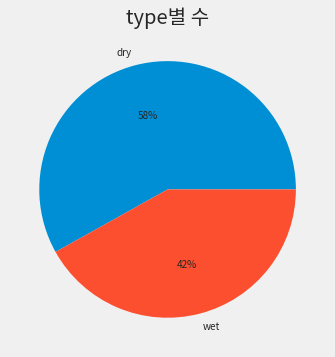

In [14]:
df_type_count = df_ox.groupby(["type"]).size()
plt.pie(df_type_count, autopct = "%.f%%", textprops = {'fontsize':10}, labels = df_type_count.index) 
plt.title("type별 수")
plt.plot(figsize=(1,1))

# Vapor도 같음

<AxesSubplot:xlabel='Ox_Chamber', ylabel='count'>

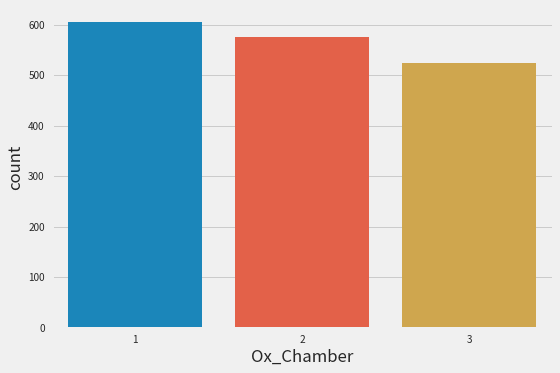

In [15]:
sns.countplot(data=df_ox, x = "Ox_Chamber")

In [17]:
# dry 시간 적게걸리는 애들 불량인지 확인 필요

In [18]:
df_ox

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2021
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2021
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2021
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2021
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,28-02-2021
1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,28-02-2021
1701,NOLSM8503213,1,Oxidation,wet,1279.160563,H2O,45.12,0.214,21,712.946,32,13,28-02-2021
1702,NOLSM8513214,1,Oxidation,wet,1272.804948,H2O,45.34,0.213,20,711.987,32,14,28-02-2021


<AxesSubplot:xlabel='Pressure', ylabel='Count'>

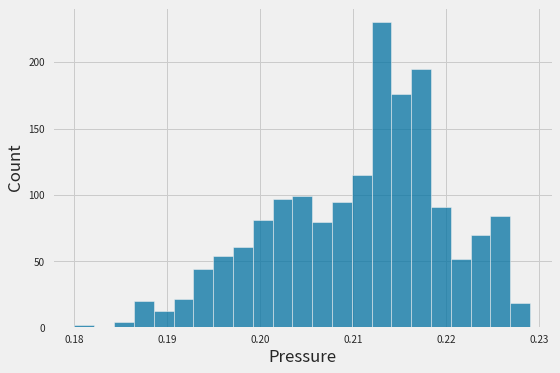

In [19]:
sns.histplot(data = df_ox, x = 'Pressure')

In [20]:
list(df_ox[df_ox.Pressure == df_ox.Pressure.min()].No_Die.values)

['NOLSM4501718450', 'NOLSM4501718']

In [22]:
QI = pd.read_csv('/home/piai/바탕화면/빅데이터프로젝트/QualityInspection.csv').iloc[:,1:]

In [23]:
QI[QI.No_Die == 'NOLSM4501718450']

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map
233,NOLSM4501718450,17,45,05-03-2021,69,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 1 0 0 0 0 0 0 ...


In [24]:
QI[QI.No_Die == 'NOLSM4501718']

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map
260,NOLSM4501718,17,18,05-03-2021,69,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 1 0 0 0 0 0 0 ...


<AxesSubplot:xlabel='Temp_OXid', ylabel='Count'>

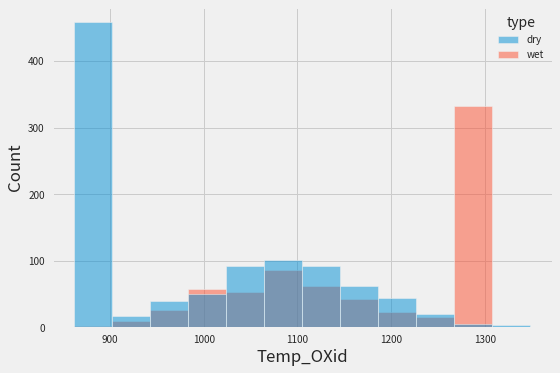

In [25]:
sns.histplot(data = df_ox, x = 'Temp_OXid', hue = "type")

<AxesSubplot:xlabel='Oxid_time', ylabel='Count'>

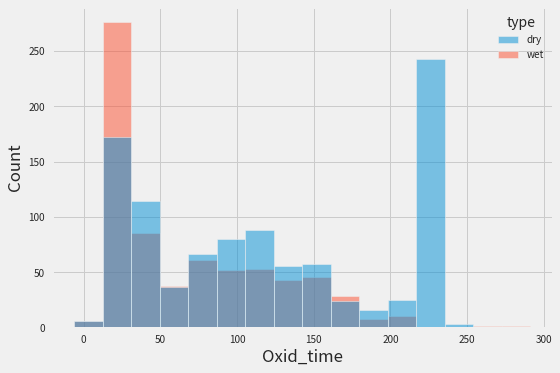

In [42]:
sns.histplot(data = df_ox, x = 'Oxid_time', hue = "type")

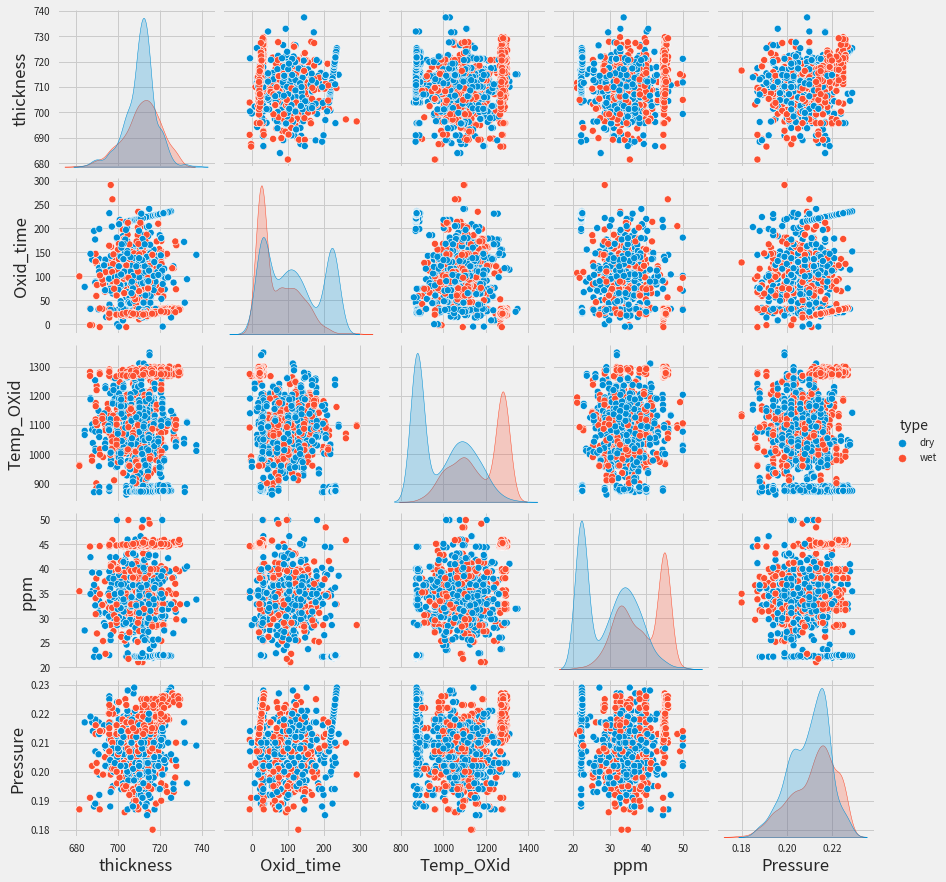

In [54]:
sns.pairplot(df_ox[['thickness', 'Oxid_time', 'Temp_OXid', 'ppm', 'Pressure', 'type']], hue='type')

In [55]:
df_ox[['thickness', 'Oxid_time', 'Temp_OXid', 'ppm', 'Pressure']].corr()

,thickness,Oxid_time,Temp_OXid,ppm,Pressure
thickness,1.000000,-0.069053,0.057659,0.055430,0.315818
Oxid_time,-0.069053,1.000000,-0.460442,-0.485736,-0.032708
Temp_OXid,0.057659,-0.460442,1.000000,0.748069,0.078750
ppm,0.055430,-0.485736,0.748069,1.000000,0.063806
Pressure,0.315818,-0.032708,0.078750,0.063806,1.000000


<AxesSubplot:xlabel='thickness', ylabel='Count'>

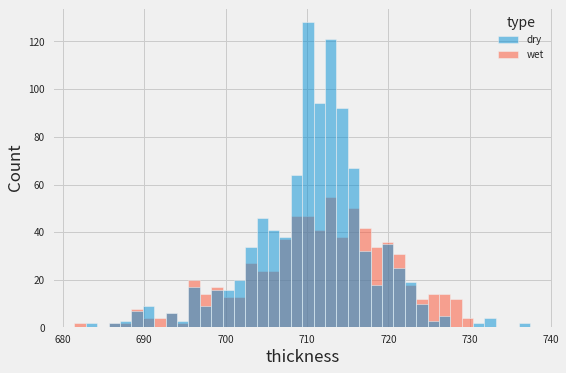

In [43]:
sns.histplot(data = df_ox, x = 'thickness', hue = "type")

<AxesSubplot:xlabel='Oxid_time', ylabel='Count'>

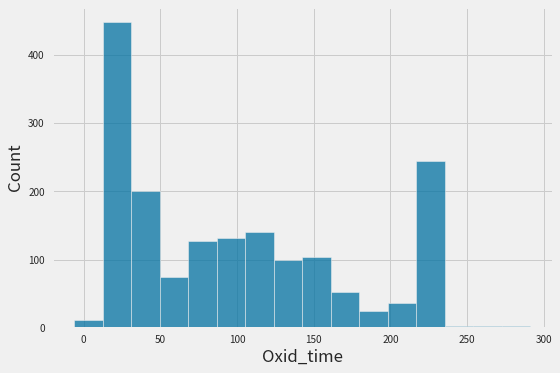

In [44]:
sns.histplot(data = df_ox, x = 'Oxid_time')

<AxesSubplot:xlabel='thickness', ylabel='Count'>

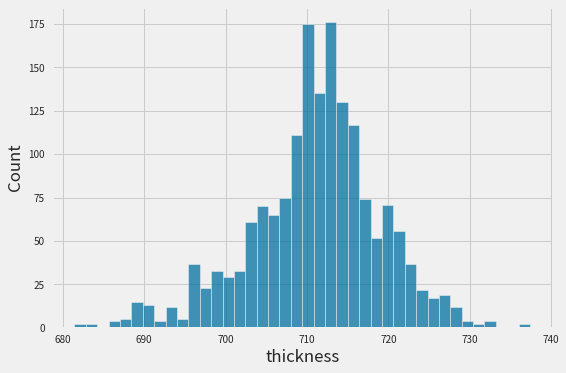

In [45]:
sns.histplot(data = df_ox, x = 'thickness')

<AxesSubplot:xlabel='ppm', ylabel='Count'>

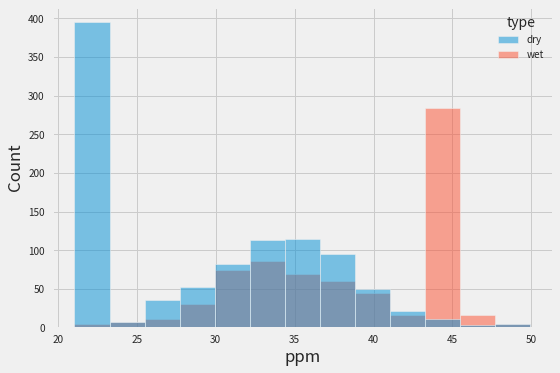

In [27]:
sns.histplot(data = df_ox, x = 'ppm', hue = "type")

In [28]:
df_ox[df_ox['Oxid_time']<0]

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime
9,NOLSM3341310334,2,Oxidation,wet,992.357358,H2O,35.26,0.202,-2,687.497,13,37,01-03-2021
36,NOLSM3341310,1,Oxidation,wet,978.149281,H2O,35.26,0.202,-2,687.497,13,10,01-03-2021
88,NOLSM359148,1,Oxidation,wet,1091.609203,H2O,35.15,0.211,-6,703.879,14,8,02-03-2021
1354,NOLSM22195,3,Oxidation,dry,1190.831353,O2,35.47,0.207,-5,700.396,9,5,25-02-2021
1382,NOLSM762296,2,Oxidation,wet,1268.333781,H2O,44.53,0.191,-2,686.530,29,6,25-02-2021
1383,NOLSM763297,2,Oxidation,wet,1274.752189,H2O,44.62,0.187,-6,691.168,29,7,25-02-2021
1463,NOLSM249106,3,Oxidation,dry,1140.375541,O2,34.12,0.214,-5,721.300,10,6,26-02-2021


In [29]:
df_ox[df_ox["thickness"]<700].type.value_counts()

wet    86
dry    76
Name: type, dtype: int64

In [30]:
df_ox[df_ox["thickness"]<700]

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime
9,NOLSM3341310334,2,Oxidation,wet,992.357358,H2O,35.26,0.202,-2,687.497,13,37,01-03-2021
23,NOLSM3481324348,2,Oxidation,wet,1264.814709,H2O,32.88,0.201,112,696.968,13,51,01-03-2021
28,NOLSM326132,1,Oxidation,dry,959.171516,O2,30.86,0.217,137,690.800,13,2,01-03-2021
36,NOLSM3341310,1,Oxidation,wet,978.149281,H2O,35.26,0.202,-2,687.497,13,10,01-03-2021
50,NOLSM3481324,3,Oxidation,wet,1263.692964,H2O,31.61,0.201,112,696.968,13,24,01-03-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,NOLSM838321838,2,Oxidation,wet,1282.288962,H2O,44.85,0.215,22,695.764,32,28,28-02-2021
1662,NOLSM298121,3,Oxidation,dry,1021.245292,O2,28.44,0.209,71,693.753,12,1,28-02-2021
1663,NOLSM299122,3,Oxidation,wet,1101.790625,H2O,29.78,0.200,60,699.262,12,2,28-02-2021
1667,NOLSM303126,1,Oxidation,dry,1070.554558,O2,36.96,0.208,100,699.815,12,6,28-02-2021


In [31]:
set(df_ox.No_Die) - set(QI.No_Die)

set()

In [32]:
set(QI.No_Die) - set(df_ox.No_Die)

set()

In [33]:
QI

,No_Die,Lot_Num,Wafer_Num,Datetime,Target,Error_message,Wafer_map
0,NOLSM325131325,13,28,01-03-2021,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
1,NOLSM326132326,13,29,01-03-2021,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...
2,NOLSM327133327,13,30,01-03-2021,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
3,NOLSM328134328,13,31,01-03-2021,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...
4,NOLSM329135329,13,32,01-03-2021,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...
1699,NOLSM8483211,32,11,28-02-2021,78,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...
1700,NOLSM8493212,32,12,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...
1701,NOLSM8503213,32,13,28-02-2021,42,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...
1702,NOLSM8513214,32,14,28-02-2021,24,none,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...


In [34]:
QI[QI.Error_message != 'none'].index

Int64Index([  16,   43,   59,   77,   86,   96,   98,  104,  168,  183,
            ...
            1485, 1486, 1488, 1512, 1565, 1566, 1619, 1646, 1678, 1688],
           dtype='int64', length=124)

<AxesSubplot:>

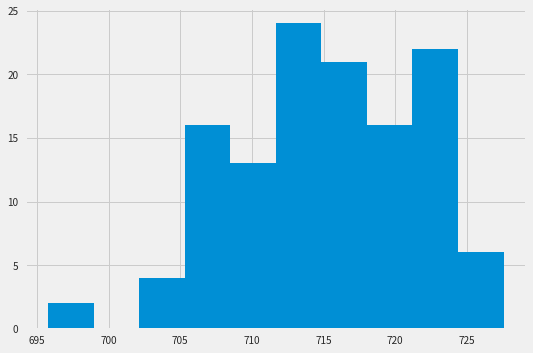

In [35]:
df_ox.loc[QI[QI.Error_message != 'none'].index]['thickness'].hist()

In [36]:
df_ox.head()

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,01-03-2021
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,13,29,01-03-2021
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,13,30,01-03-2021
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,01-03-2021
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,13,32,01-03-2021


In [37]:
QI.loc[df_ox[df_ox['thickness'] < 700].index].Error_message.value_counts().plot.pie(auto)
plt.show()

NameError: name 'auto' is not defined

In [38]:
QI.Error_message.value_counts()

none               1580
[['Edge-Loc']]       57
[['Loc']]            31
[['Random']]         11
[['Center']]         10
[['Scratch']]         7
[['Near-full']]       4
[['Edge-Ring']]       4
Name: Error_message, dtype: int64